In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Sakshi\Downloads\e-commerce.csv")
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.shape

(10999, 12)

In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [8]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [9]:
def clean_column_names(df):
    for col in df.columns:
        df = df.rename(columns={col: col.strip().lower().replace(" ", "_")})
        
    return df

df = clean_column_names(df)
df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n'],
      dtype='object')

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached.on.time_y.n    0
dtype: int64


#### id

In [11]:
df["id"].value_counts()

id
1        1
7337     1
7329     1
7330     1
7331     1
        ..
3669     1
3670     1
3671     1
3672     1
10999    1
Name: count, Length: 10999, dtype: int64

## warehouse_block

In [12]:
df["warehouse_block"].nunique()

5

In [13]:
df["warehouse_block"].describe()

count     10999
unique        5
top           F
freq       3666
Name: warehouse_block, dtype: object

In [14]:
warehouse_block=df['warehouse_block'].value_counts().reset_index()
warehouse_block

,warehouse_block,count
0,F,3666
1,D,1834
2,A,1833
3,B,1833
4,C,1833


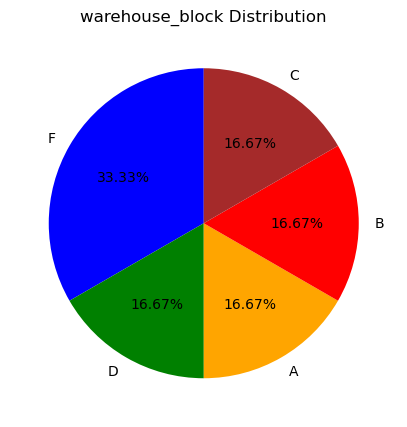

In [15]:
plt.figure(figsize=(5, 8))
warehouse_block = df["warehouse_block"] .value_counts()
plt.pie(warehouse_block, labels=warehouse_block.index, autopct='%.2f%%', startangle = 90, colors=('Blue','green','orange' ,'red' ,'brown'))
plt.title('warehouse_block Distribution')
plt.show()

In [16]:
warehouse_block_qty = df.groupby("warehouse_block")["cost_of_the_product"].sum().reset_index()
warehouse_block_qty.head()

,warehouse_block,cost_of_the_product
0,A,382671
1,B,388888
2,C,387114
3,D,386805
4,F,766477


### mode_of_shipment

In [17]:
df["mode_of_shipment"].nunique()

3

In [18]:
df["mode_of_shipment"].describe()

count     10999
unique        3
top        Ship
freq       7462
Name: mode_of_shipment, dtype: object

In [19]:
mode_of_shipment=df['mode_of_shipment'].value_counts().reset_index()
mode_of_shipment

,mode_of_shipment,count
0,Ship,7462
1,Flight,1777
2,Road,1760


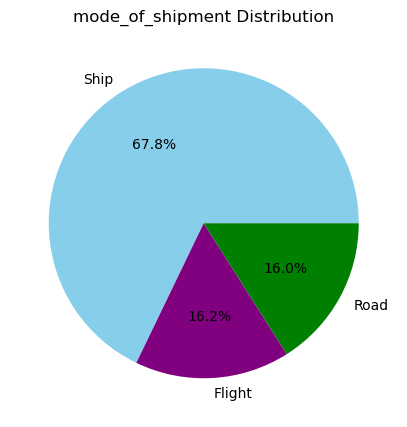

In [20]:
plt.figure(figsize=(5, 8))
mode_of_shipment = df["mode_of_shipment"] .value_counts()
plt.pie(mode_of_shipment, labels=mode_of_shipment.index, autopct='%1.1f%%', colors=('skyblue', 'Purple','green' ))
plt.title('mode_of_shipment Distribution')
plt.show()

## customer_care_calls

In [21]:
df["customer_care_calls"].nunique()

6

In [22]:
df["customer_care_calls"].describe()

count    10999.000000
mean         4.054459
std          1.141490
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: customer_care_calls, dtype: float64

In [23]:
customer_care_calls=df['customer_care_calls'].value_counts().reset_index()
customer_care_calls

,customer_care_calls,count
0,4,3557
1,3,3217
2,5,2328
3,6,1013
4,2,638
5,7,246


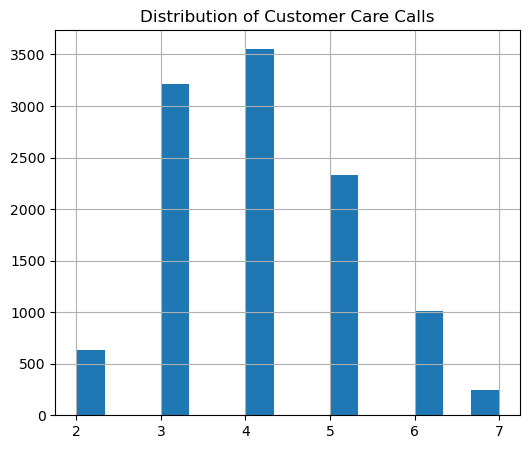

In [24]:
plt.figure(figsize=(6, 5))
df['customer_care_calls'].hist(bins=15)
plt.title('Distribution of Customer Care Calls')
plt.show()

## customer_rating 

In [25]:
df["customer_rating"].nunique()

5

In [26]:
#df['customer_rating'] = df['customer_rating'].astype(str)

In [27]:
df["customer_rating"].describe()

count    10999.000000
mean         2.990545
std          1.413603
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: customer_rating, dtype: float64

In [28]:
customer_rating=df['customer_rating'].value_counts().reset_index()
customer_rating

,customer_rating,count
0,3,2239
1,1,2235
2,4,2189
3,5,2171
4,2,2165


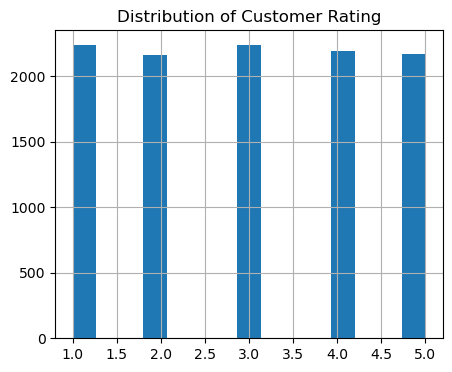

In [29]:
plt.figure(figsize=(5, 4))
df['customer_rating'].hist(bins=15)
plt.title('Distribution of Customer Rating')
plt.show()

In [30]:
def func(x):
    if x < 2.99:
        return"BAD"
    else:
        return"GOOD"

In [31]:
#df["customer_rating"] =df["customer_rating"].apply(lambda x: func(x))
#df["customer_rating"]

## Cost_of_the_Product

In [32]:
df["cost_of_the_product"].nunique()

215

In [33]:
df["cost_of_the_product"].describe()

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: cost_of_the_product, dtype: float64

In [34]:
cost_of_the_product=df['cost_of_the_product'].value_counts().reset_index()
cost_of_the_product

,cost_of_the_product,count
0,245,110
1,257,109
2,260,106
3,254,101
4,264,100
...,...,...
210,107,5
211,99,5
212,120,5
213,96,5


In [35]:
df['cost_of_the_product_cleaned'] = np.where(df['cost_of_the_product'] <= 170, 'low_cost' ,
                                  np.where(df['cost_of_the_product'] <= 250, 'Medium_cost', 'High_cost'))
df['cost_of_the_product_cleaned'].value_counts()

cost_of_the_product_cleaned
Medium_cost    5413
low_cost       2808
High_cost      2778
Name: count, dtype: int64

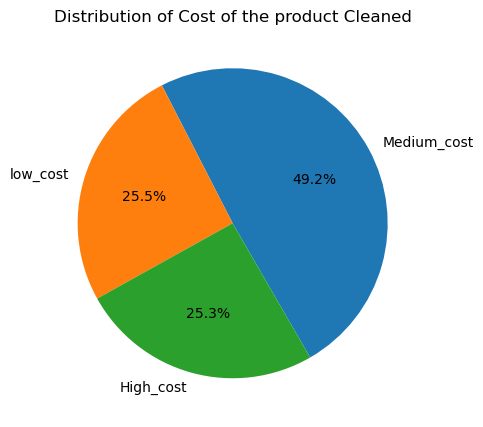

In [36]:
plt.figure(figsize=(5, 8))
cost_of_the_product_cleaned= df["cost_of_the_product_cleaned"] .value_counts()
plt.pie(cost_of_the_product_cleaned, labels=cost_of_the_product_cleaned.index, autopct='%1.1f%%' ,startangle=300 )
plt.title('Distribution of Cost of the product Cleaned')
plt.show()

In [37]:
df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n', 'cost_of_the_product_cleaned'],
      dtype='object')

## prior_purchases

In [38]:
df["prior_purchases"].nunique()

8

In [39]:
df["prior_purchases"].describe()

count    10999.000000
mean         3.567597
std          1.522860
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: prior_purchases, dtype: float64

In [40]:
prior_purchases=df['prior_purchases'].value_counts().reset_index()
prior_purchases

,prior_purchases,count
0,3,3955
1,2,2599
2,4,2155
3,5,1287
4,6,561
5,10,178
6,7,136
7,8,128


In [41]:
pd.DataFrame(df['prior_purchases'].value_counts(normalize=True)).reset_index()


,prior_purchases,proportion
0,3,0.359578
1,2,0.236294
2,4,0.195927
3,5,0.117011
4,6,0.051005
5,10,0.016183
6,7,0.012365
7,8,0.011637


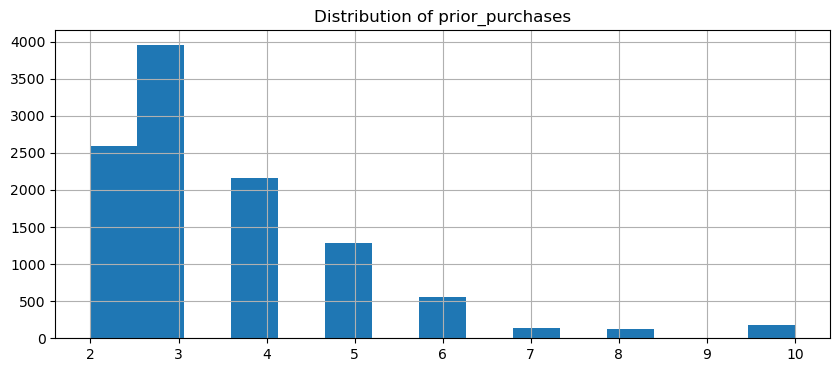

In [42]:
plt.figure(figsize=(10, 4))
df['prior_purchases'].hist(bins=15)
plt.title('Distribution of prior_purchases')
plt.show()

plt.figure(figsize=(10, 4))
df['prior_purchases'].hist(bins=15)
plt.title('Distribution of prior_purchases')
plt.show()

 ## product_importance

In [43]:
df["product_importance"].nunique()

3

In [44]:
df["product_importance"].describe()

count     10999
unique        3
top         low
freq       5297
Name: product_importance, dtype: object

In [45]:
product_importance=df['product_importance'].value_counts().reset_index()
product_importance

,product_importance,count
0,low,5297
1,medium,4754
2,high,948


In [46]:
pd.DataFrame(df['product_importance'].value_counts(normalize=True)).reset_index()

,product_importance,proportion
0,low,0.481589
1,medium,0.432221
2,high,0.086190


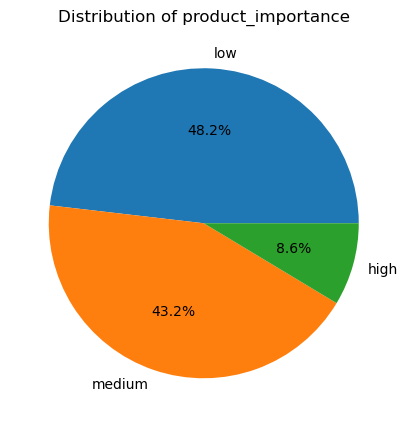

In [47]:
plt.figure(figsize=(5, 8))
product_importance = df["product_importance"] .value_counts()
plt.pie(product_importance, labels=product_importance.index, autopct='%1.1f%%' )
plt.title('Distribution of product_importance')
plt.show()

plt.figure(figsize=(5, 3))
df['product_importance'].hist(bins=15)
plt.title('Distribution of product_importance ')
plt.show()

## gender

In [48]:
df["gender"].nunique()

2

In [49]:
df["gender"].describe()

count     10999
unique        2
top           F
freq       5545
Name: gender, dtype: object

In [50]:
gender=df['gender'].value_counts().reset_index()
gender

,gender,count
0,F,5545
1,M,5454


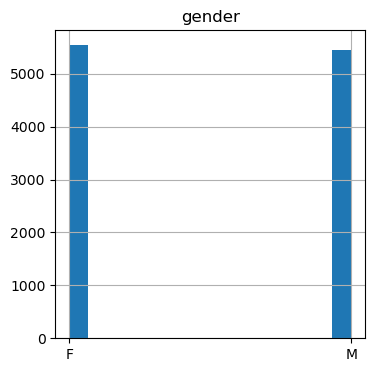

In [74]:
plt.figure(figsize=(4, 4))
df['gender'].hist(bins=15)
plt.title('gender')
plt.show()

## discount_offered

In [52]:
df["discount_offered"].nunique()

65

In [53]:
df["discount_offered"].describe()

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: discount_offered, dtype: float64

In [54]:
discount_offered=df['discount_offered'].value_counts().reset_index()
discount_offered

,discount_offered,count
0,10,860
1,2,858
2,6,849
3,9,845
4,3,840
...,...,...
60,65,36
61,26,36
62,42,35
63,25,34


In [55]:
pd.DataFrame(df['discount_offered'].value_counts(normalize=True)).reset_index()

,discount_offered,proportion
0,10,0.078189
1,2,0.078007
2,6,0.077189
3,9,0.076825
4,3,0.076371
...,...,...
60,65,0.003273
61,26,0.003273
62,42,0.003182
63,25,0.003091


In [56]:
#df['discount_offered'] = pd.to_numeric(df['discount_offered'], errors='coerce')

In [57]:
df['discount_offered_cleaned'] = np.where(df['discount_offered'] <= 4, 'Less', 
                                  np.where(df['discount_offered'] <= 10, 'Normal', 'Too Much'))
df['discount_offered_cleaned']


0        Too Much
1        Too Much
2        Too Much
3          Normal
4        Too Much
           ...   
10994        Less
10995      Normal
10996        Less
10997        Less
10998      Normal
Name: discount_offered_cleaned, Length: 10999, dtype: object

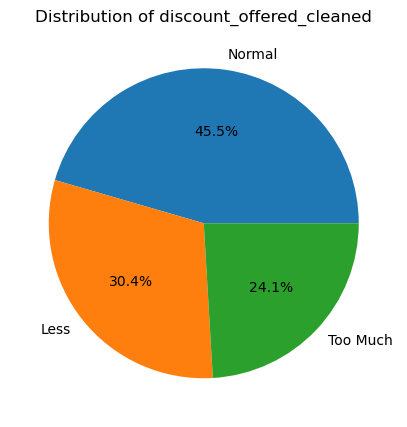

In [58]:
plt.figure(figsize=(5, 8))
discount_offered_cleaned= df["discount_offered_cleaned"] .value_counts()
plt.pie(discount_offered_cleaned, labels=discount_offered_cleaned.index, autopct='%1.1f%%'  )
plt.title('Distribution of discount_offered_cleaned')
plt.show()

In [59]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n,cost_of_the_product_cleaned,discount_offered_cleaned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Medium_cost,Too Much
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Medium_cost,Too Much
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Medium_cost,Too Much
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Medium_cost,Normal
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Medium_cost,Too Much


## Weight_in_gms

In [60]:
df["weight_in_gms"].nunique()

4034

In [61]:
df["weight_in_gms"].describe()

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: weight_in_gms, dtype: float64

In [62]:
weight_in_gms=df['weight_in_gms'].value_counts().reset_index()
weight_in_gms

,weight_in_gms,count
0,4883,12
1,1145,10
2,5783,10
3,4741,10
4,5672,10
...,...,...
4029,1425,1
4030,3811,1
4031,1609,1
4032,2178,1


In [63]:
pd.DataFrame(df['weight_in_gms'].value_counts(normalize=True)).reset_index()

,weight_in_gms,proportion
0,4883,0.001091
1,1145,0.000909
2,5783,0.000909
3,4741,0.000909
4,5672,0.000909
...,...,...
4029,1425,0.000091
4030,3811,0.000091
4031,1609,0.000091
4032,2178,0.000091


In [64]:
df['weight_in_gms_cleaned'] = np.where(df['weight_in_gms'] <=1500 , 'Light' , 
                                  np.where(df['weight_in_gms'] <= 3000, 'Medium', 
                                          np.where(df['weight_in_gms'] <= 4500, 'Heavy', 'Very Heavy')))
df['weight_in_gms_cleaned'].value_counts()

weight_in_gms_cleaned
Very Heavy    4433
Medium        2511
Heavy         2422
Light         1633
Name: count, dtype: int64

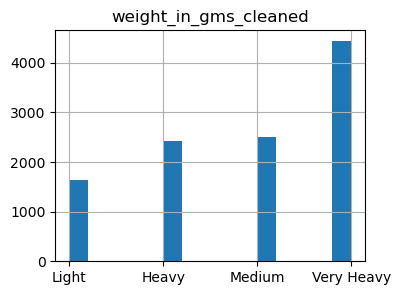

In [65]:
plt.figure(figsize=(4, 3))
df['weight_in_gms_cleaned'].hist(bins=15)
plt.title('weight_in_gms_cleaned')
plt.show()

In [66]:
df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n', 'cost_of_the_product_cleaned',
       'discount_offered_cleaned', 'weight_in_gms_cleaned'],
      dtype='object')

## reached.on.time_y.n

In [67]:
df["reached.on.time_y.n"].nunique()

2

In [68]:
df['reached.on.time_y.n'] = df['reached.on.time_y.n'].astype(str)

In [69]:
df["reached.on.time_y.n"].describe()

count     10999
unique        2
top           1
freq       6563
Name: reached.on.time_y.n, dtype: object

In [70]:
df["reached.on.time_y.n"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10999 entries, 0 to 10998
Series name: reached.on.time_y.n
Non-Null Count  Dtype 
--------------  ----- 
10999 non-null  object
dtypes: object(1)
memory usage: 86.1+ KB


In [71]:
df['reached.on.time_y.n'].value_counts().reset_index()

,reached.on.time_y.n,count
0,1,6563
1,0,4436


<Axes: xlabel='reached.on.time_y.n', ylabel='count'>

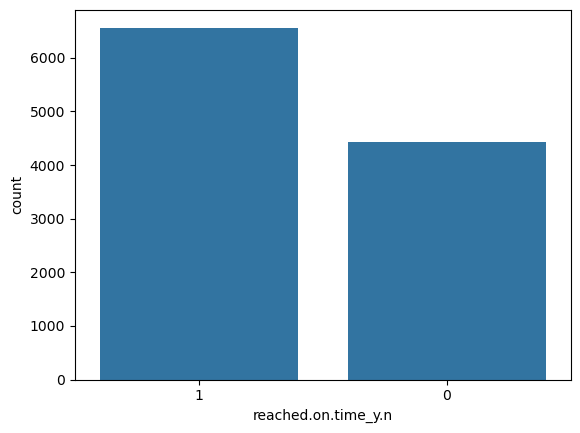

In [72]:
sns.countplot(data=df, x='reached.on.time_y.n')

In [73]:
df[['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n', 'cost_of_the_product_cleaned',
       'discount_offered_cleaned','weight_in_gms_cleaned']].to_csv("Ecommerce_Product_Data_Cleaned.csv",index=False)